In [ ]:
# This is working with results20231022
# from this folder: https://drive.google.com/drive/folders/13jxz5KHbQwAPA0NMwBNFTYEHyHUCrdNF?usp=sharing (ask access)
# Data from: https://github.com/MHC-Seg-Research/Our-UNet-Code/tree/iterative


import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

carte_history = np.load('/content/drive/MyDrive/UNetFolder/result20231022/carte_history.npy')
polar_history = np.load('/content/drive/MyDrive/UNetFolder/result20231022/polar_history.npy')
scorematrix_round_0 = np.load('/content/drive/MyDrive/UNetFolder/result20231022/scorematrix_round_0.npy')
scorematrix_round_1 = np.load('/content/drive/MyDrive/UNetFolder/result20231022/scorematrix_round_1.npy')
scorematrix_round_2 = np.load('/content/drive/MyDrive/UNetFolder/result20231022/scorematrix_round_2.npy')
scorematrix_round_3 = np.load('/content/drive/MyDrive/UNetFolder/result20231022/scorematrix_round_3.npy')
history_round_3 = np.load('/content/drive/MyDrive/UNetFolder/result20231022/history_round_3.npy')

print(carte_history.shape)
print(polar_history.shape)
print(scorematrix_round_0.shape)
print(history_round_3.shape)
print(scorematrix_round_0)
print(history_round_3)


Mounted at /content/drive
(5, 100)
(5, 100)
(7404, 10)
(7404, 5)
[[0.91708441 0.91304386 0.90847607 ... 0.         0.         0.        ]
 [0.95643809 0.         0.         ... 0.73240527 0.94499091 0.82300636]
 [0.         0.         0.         ... 0.55993785 0.63105599 0.72304652]
 ...
 [0.76693139 0.80571084 0.84957627 ... 0.         0.         0.        ]
 [0.76484806 0.87826131 0.94816957 ... 0.         0.         0.        ]
 [0.84650346 0.88044803 0.88580339 ... 0.         0.         0.        ]]
[[ True  True False  True False]
 [False False False  True  True]
 [False False  True False  True]
 ...
 [ True  True  True False False]
 [ True  True False False  True]
 [ True False False False  True]]


## Sorted In-Group Score Across Rounds

### Focusing on the change area

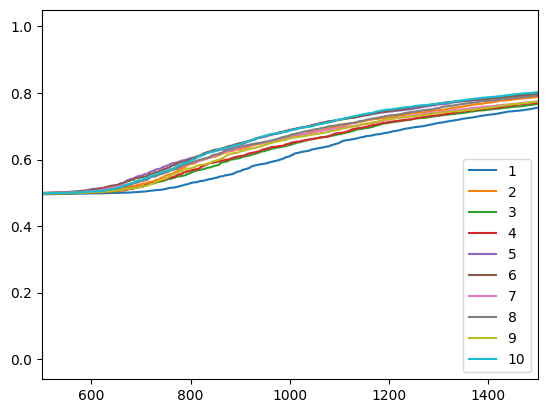

In [ ]:
# from result reading (Yichen) (calculated in-group score differently)
# Sorted in-group scores
for i in range(10):
    x_range = 7404
    file_path = f'/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_{i}.npy'
    matrix = np.load(file_path)
    picked_score = np.zeros(matrix[:,0].shape)
    i = 0
    for row in matrix:
        # Split the row into two subarrays
        subarray1, subarray2 = np.split(row, 2)
        # Determine which subarray contains the zeros and get the in-group score
        if np.count_nonzero(subarray1) == 1:
            picked_score[i] = subarray1[subarray1 != 0][0]  # Get the non-zero value
        else:
            picked_score[i] = subarray2[subarray2 != 0][0]  # Get the non-zero value
        i += 1
    plt.plot(np.sort(picked_score))
    plt.legend([1,2,3,4,5, 6, 7, 8,9,10])
plt.xlim(500, 1500) # Zoom in option

plt.show()

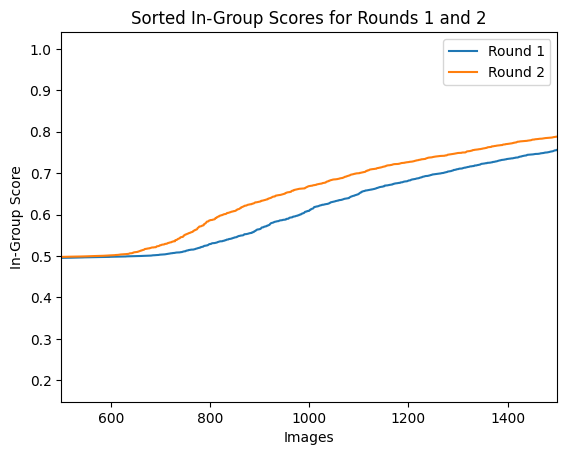

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate picked scores
def calculate_picked_scores(matrix):
    picked_scores = np.zeros(matrix.shape[0])
    for idx, row in enumerate(matrix):
        # Split the row into two subarrays
        subarray1, subarray2 = np.split(row, 2)
        # Determine which subarray contains the zeros and get the in-group score
        if np.count_nonzero(subarray1) == 1:
            picked_scores[idx] = subarray1[subarray1 != 0][0]  # Get the non-zero value
        else:
            picked_scores[idx] = subarray2[subarray2 != 0][0]  # Get the non-zero value
    return picked_scores

# Loop through the first two rounds and plot
for round_num in range(2):
    file_path = f'/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_{round_num}.npy'
    matrix = np.load(file_path)
    picked_score = calculate_picked_scores(matrix)
    plt.plot(np.sort(picked_score), label=f'Round {round_num + 1}')

plt.legend()
plt.xlim(500, 1500) # Zoom in option
plt.xlabel('Images')
plt.ylabel('In-Group Score')
plt.title('Sorted In-Group Scores for Rounds 1 and 2')
plt.show()


### In group score and variation from round 1 and 2

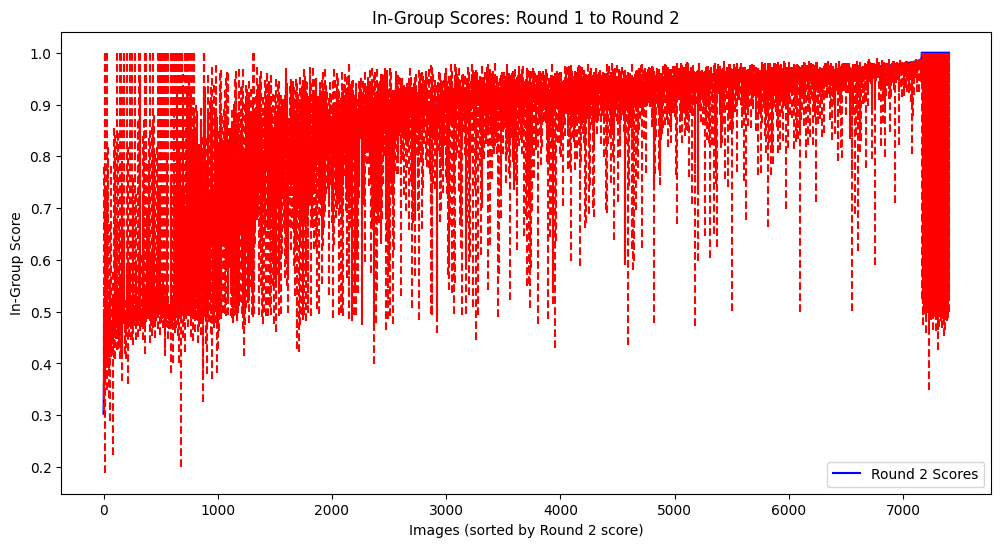

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_picked_scores(matrix):
    """ Calculate the picked scores for each image in the matrix. """
    picked_scores = np.zeros(matrix.shape[0])
    for i, row in enumerate(matrix):
        # Split the row into two subarrays
        subarray1, subarray2 = np.split(row, 2)
        # Determine which subarray contains the zeros and get the in-group score
        if np.count_nonzero(subarray1) == 1:
            picked_scores[i] = subarray1[subarray1 != 0][0]  # Get the non-zero value
        else:
            picked_scores[i] = subarray2[subarray2 != 0][0]  # Get the non-zero value
    return picked_scores

# Load the score matrices for round 0 and 1
file_path_0 = '/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_0.npy'
file_path_1 = '/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_1.npy'
score_matrix_round_0 = np.load(file_path_0)
score_matrix_round_1 = np.load(file_path_1)

# Calculate the picked scores for each round
picked_scores_round_0 = calculate_picked_scores(score_matrix_round_0)
picked_scores_round_1 = calculate_picked_scores(score_matrix_round_1)

# Sort the scores for the second round and keep the original indices to track changes
sorted_indices_round_1 = np.argsort(picked_scores_round_1)
sorted_scores_round_1 = picked_scores_round_1[sorted_indices_round_1]
corresponding_scores_round_0 = picked_scores_round_0[sorted_indices_round_1]

# Plotting
plt.figure(figsize=(12, 6))
# Plot sorted scores for the second round
plt.plot(sorted_scores_round_1, label='Round 2 Scores', color='blue')

# Add spikes to show the difference from the first round
for i in range(len(sorted_scores_round_1)):
    plt.plot([i, i], [corresponding_scores_round_0[i], sorted_scores_round_1[i]], color='red', linestyle='--')

plt.title("In-Group Scores: Round 1 to Round 2")
plt.xlabel("Images (sorted by Round 2 score)")
plt.ylabel("In-Group Score")
plt.legend()
#plt.xlim(500, 1500)  # Zoom in as specified
plt.show()


### In group variation round 1 to round 2 with start markers


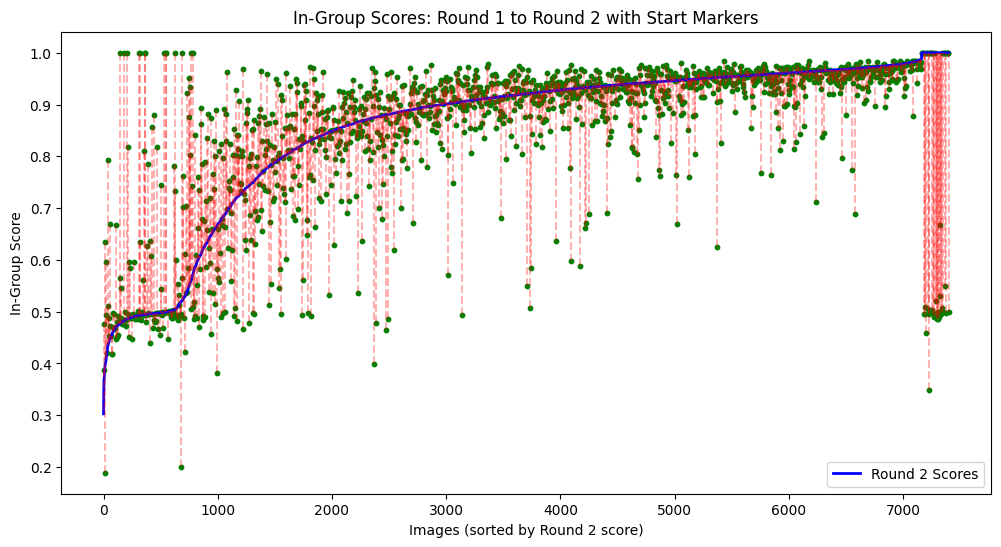

In [ ]:
# a clearer plot?

import numpy as np
import matplotlib.pyplot as plt

def calculate_picked_scores(matrix):
    """ Calculate the picked scores for each image in the matrix. """
    picked_scores = np.zeros(matrix.shape[0])
    for i, row in enumerate(matrix):
        # Split the row into two subarrays
        subarray1, subarray2 = np.split(row, 2)
        # Determine which subarray contains the zeros and get the in-group score
        if np.count_nonzero(subarray1) == 1:
            picked_scores[i] = subarray1[subarray1 != 0][0]  # Get the non-zero value
        else:
            picked_scores[i] = subarray2[subarray2 != 0][0]  # Get the non-zero value
    return picked_scores

# Load the score matrices for round 0 and 1
file_path_0 = '/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_0.npy'
file_path_1 = '/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_1.npy'
score_matrix_round_0 = np.load(file_path_0)
score_matrix_round_1 = np.load(file_path_1)

# Calculate the picked scores for each round
picked_scores_round_0 = calculate_picked_scores(score_matrix_round_0)
picked_scores_round_1 = calculate_picked_scores(score_matrix_round_1)

# Sort the scores for the second round and keep the original indices to track changes
sorted_indices_round_1 = np.argsort(picked_scores_round_1)
sorted_scores_round_1 = picked_scores_round_1[sorted_indices_round_1]
corresponding_scores_round_0 = picked_scores_round_0[sorted_indices_round_1]

# Plotting
plt.figure(figsize=(12, 6))
# Plot sorted scores for the second round
plt.plot(sorted_scores_round_1, label='Round 2 Scores', color='blue', linewidth=2)
n = 5
# Add spikes and markers to show the difference from the first round
for i in range(len(sorted_scores_round_1)):
    if i % n == 0:  # Thinning out the spikes by plotting every nth spike
        plt.plot([i, i], [corresponding_scores_round_0[i], sorted_scores_round_1[i]],
                 color='red', linestyle='--', alpha=0.3)
        # Add a marker at the start of the spike
        plt.scatter(i, corresponding_scores_round_0[i], color='green', s=10)

plt.title("In-Group Scores: Round 1 to Round 2 with Start Markers")
plt.xlabel("Images (sorted by Round 2 score)")
plt.ylabel("In-Group Score")
plt.legend()
plt.show()


### In group score variation from round 1 to 2 (Polar and Cartesian Separately)

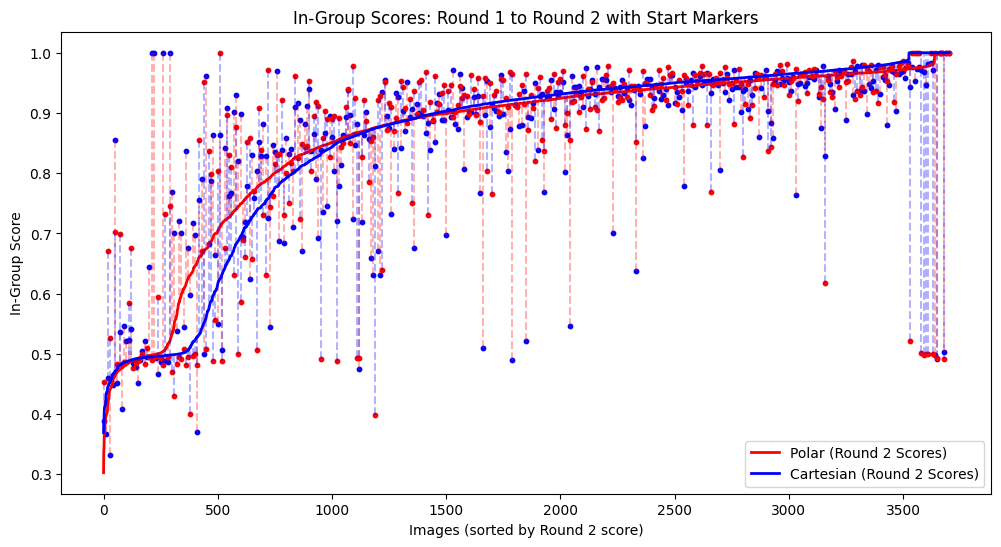

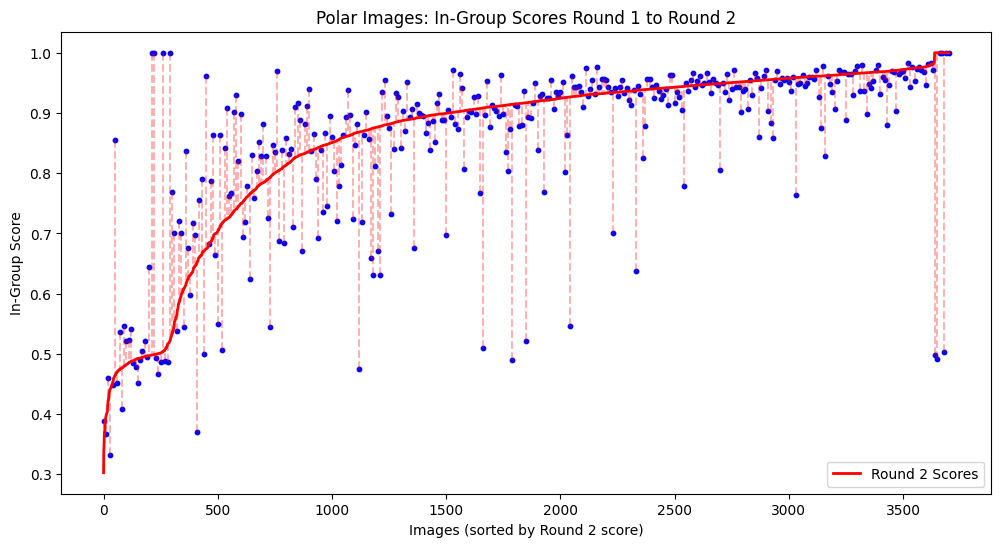

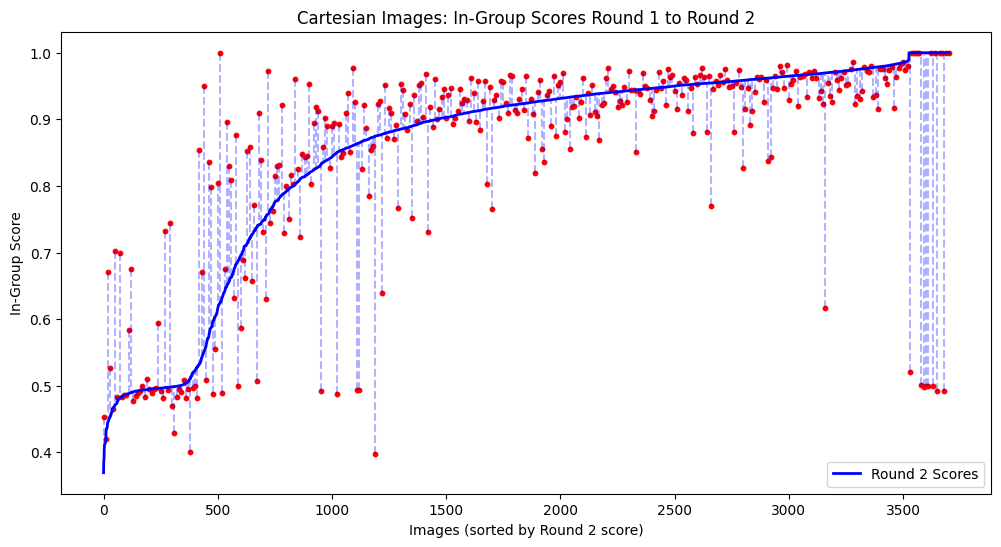

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_picked_scores(matrix):
    """ Calculate the picked scores for each image in the matrix. """
    picked_scores = np.zeros(matrix.shape[0])
    image_types = np.zeros(matrix.shape[0], dtype=bool)  # True for Polar, False for Cartesian
    for i, row in enumerate(matrix):
        # Split the row into two subarrays
        subarray1, subarray2 = np.split(row, 2)
        # Determine which subarray contains the zeros and get the in-group score
        if np.count_nonzero(subarray1) == 1:
            picked_scores[i] = subarray1[subarray1 != 0][0]  # Get the non-zero value
            image_types[i] = True  # Polar
        else:
            picked_scores[i] = subarray2[subarray2 != 0][0]  # Get the non-zero value
            image_types[i] = False  # Cartesian
    return picked_scores, image_types

# Dummy data for demonstration
# In your case, you would load the matrices from the file paths
# Load the score matrices for round 0 and 1
file_path_0 = '/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_0.npy'
file_path_1 = '/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_1.npy'
score_matrix_round_0 = np.load(file_path_0)
score_matrix_round_1 = np.load(file_path_1)

# Calculate the picked scores and types for each round
picked_scores_round_0, types_round_0 = calculate_picked_scores(score_matrix_round_0)
picked_scores_round_1, types_round_1 = calculate_picked_scores(score_matrix_round_1)

# Assuming n is defined, if not, set n to 1
n = 10

# Plotting
plt.figure(figsize=(12, 6))

# Separate the scores by type
for image_type in [True, False]:  # True for Polar, False for Cartesian
    # Filter the scores and indices by image type
    indices = np.where(types_round_1 == image_type)[0]
    sorted_indices = np.argsort(picked_scores_round_1[indices])
    sorted_scores = picked_scores_round_1[indices][sorted_indices]
    corresponding_scores = picked_scores_round_0[indices][sorted_indices]

    # Plot sorted scores for the second round
    if image_type:  # Polar
        plt.plot(sorted_scores, color='red', linewidth=2, label='Polar (Round 2 Scores)')
        marker_color = 'blue'
    else:  # Cartesian
        plt.plot(sorted_scores, color='blue', linewidth=2, label='Cartesian (Round 2 Scores)')
        marker_color = 'red'

    # Add spikes and markers to show the difference from the first round
    for i in range(len(sorted_scores)):
        if i % n == 0:  # Thinning out the spikes by plotting every nth spike
            plt.plot([i, i], [corresponding_scores[i], sorted_scores[i]],
                     color='red' if image_type else 'blue', linestyle='--', alpha=0.3)
            # Add a marker at the start of the spike
            plt.scatter(i, corresponding_scores[i], color=marker_color, s=10)

plt.title("In-Group Scores: Round 1 to Round 2 with Start Markers")
plt.xlabel("Images (sorted by Round 2 score)")
plt.ylabel("In-Group Score")
plt.legend()
plt.show()

# Function to plot the scores for a specific image type (Polar or Cartesian)
def plot_scores(image_type, scores_round_0, scores_round_1, types, n):
    # Filter the scores and indices by image type
    indices = np.where(types == image_type)[0]
    sorted_indices = np.argsort(scores_round_1[indices])
    sorted_scores = scores_round_1[indices][sorted_indices]
    corresponding_scores = scores_round_0[indices][sorted_indices]

    plt.figure(figsize=(12, 6))

    # Plot sorted scores for the second round and add spikes and markers
    if image_type:  # Polar
        plt.plot(sorted_scores, color='red', linewidth=2, label='Round 2 Scores')
        marker_color = 'blue'
        title = "Polar Images: In-Group Scores Round 1 to Round 2"
    else:  # Cartesian
        plt.plot(sorted_scores, color='blue', linewidth=2, label='Round 2 Scores')
        marker_color = 'red'
        title = "Cartesian Images: In-Group Scores Round 1 to Round 2"

    for i in range(len(sorted_scores)):
        if i % n == 0:
            plt.plot([i, i], [corresponding_scores[i], sorted_scores[i]],
                     color='red' if image_type else 'blue', linestyle='--', alpha=0.3)
            plt.scatter(i, corresponding_scores[i], color=marker_color, s=10)

    plt.title(title)
    plt.xlabel("Images (sorted by Round 2 score)")
    plt.ylabel("In-Group Score")
    plt.legend()
    plt.show()

# Plot for Polar images
plot_scores(True, picked_scores_round_0, picked_scores_round_1, types_round_1, n)

# Plot for Cartesian images
plot_scores(False, picked_scores_round_0, picked_scores_round_1, types_round_1, n)


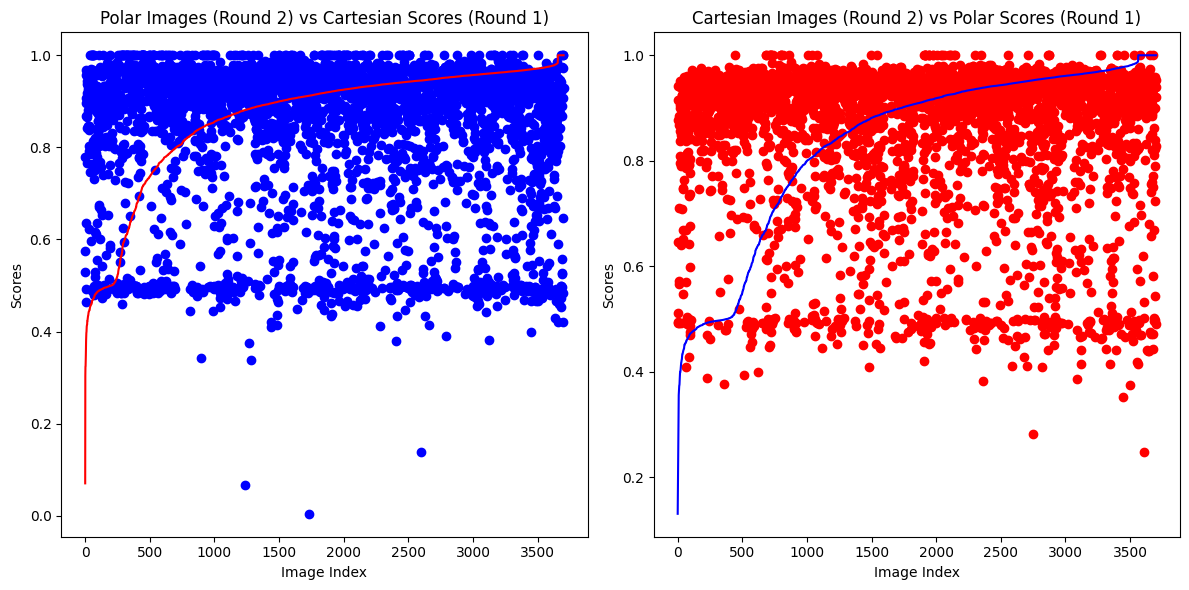

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_in_group_scores(matrix):
    picked_score = np.zeros(matrix.shape[0])
    for i, row in enumerate(matrix):
        subarray1, subarray2 = np.split(row, 2)
        if np.count_nonzero(subarray1) == 1:
            picked_score[i] = subarray1[subarray1 != 0][0]
        else:
            picked_score[i] = subarray2[subarray2 != 0][0]
    return picked_score

# Load data for two rounds
rounds = [2, 3]  # Specify the rounds you want to analyze
scores = []

for round_num in rounds:
    file_path = f'/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_{round_num}.npy'
    matrix = np.load(file_path)
    scores.append(get_in_group_scores(matrix))

# Determine Polar and Cartesian Scores for Round 2
polar_indices = []
cartesian_indices = []

for i, row in enumerate(matrix):
    subarray1, subarray2 = np.split(row, 2)
    if np.count_nonzero(subarray1) == 1:
        polar_indices.append(i)
    else:
        cartesian_indices.append(i)

# Sorting Round 2 Scores and Mapping Round 1 Scores
polar_round2_sorted_indices = np.argsort(scores[1][polar_indices])
cartesian_round2_sorted_indices = np.argsort(scores[1][cartesian_indices])

# Plotting
plt.figure(figsize=(12, 6))

# Polar Plot
plt.subplot(1, 2, 1)
plt.plot(np.sort(scores[1][polar_indices]), color='red')
# For Polar Round 2 scores, plot corresponding Cartesian Round 1 scores
plt.scatter(polar_round2_sorted_indices, scores[0][cartesian_indices][polar_round2_sorted_indices], color='blue')
plt.title('Polar Images (Round 2) vs Cartesian Scores (Round 1)')
plt.xlabel('Image Index')
plt.ylabel('Scores')

# Cartesian Plot
plt.subplot(1, 2, 2)
plt.plot(np.sort(scores[1][cartesian_indices]), color='blue')
# For Cartesian Round 2 scores, plot corresponding Polar Round 1 scores
plt.scatter(cartesian_round2_sorted_indices, scores[0][polar_indices][cartesian_round2_sorted_indices], color='red')
plt.title('Cartesian Images (Round 2) vs Polar Scores (Round 1)')
plt.xlabel('Image Index')
plt.ylabel('Scores')

plt.tight_layout()
plt.show()
# # Plotting
# plt.figure(figsize=(12, 6))

# # Polar Plot
# plt.subplot(1, 2, 1)
# plt.plot(np.sort(scores[1][polar_indices]), color='red')
# plt.scatter(polar_round2_sorted_indices, scores[0][polar_indices][polar_round2_sorted_indices], color='blue')
# plt.title('Polar Images')
# plt.xlabel('Image Index')
# plt.ylabel('Scores')

# # Cartesian Plot
# plt.subplot(1, 2, 2)
# plt.plot(np.sort(scores[1][cartesian_indices]), color='blue')
# plt.scatter(cartesian_round2_sorted_indices, scores[0][cartesian_indices][cartesian_round2_sorted_indices], color='red')
# plt.title('Cartesian Images')
# plt.xlabel('Image Index')
# plt.ylabel('Scores')

# plt.tight_layout()
# plt.show()


# Sketch Work

In [ ]:
# Filled curve (5 out of group score spread)
# Let's just plot the median of out of score plot first
import numpy as np
import matplotlib.pyplot as plt

def calculate_in_and_out_of_group_scores(matrix):
    """ Calculate the in-group scores and out-of-group statistics for the matrix. """
    in_group_scores = np.zeros(matrix.shape[0])
    out_of_group_stats = np.zeros((matrix.shape[0], 3))  # min, max, median
    for i, row in enumerate(matrix):
        subarray1, subarray2 = np.split(row, 2)
        if np.count_nonzero(subarray1) == 1:
            in_group_scores[i] = subarray1[subarray1 != 0][0]
            out_of_group_stats[i] = [np.min(subarray2), np.max(subarray2), np.median(subarray2)]
        else:
            in_group_scores[i] = subarray2[subarray2 != 0][0]
            out_of_group_stats[i] = [np.min(subarray1), np.max(subarray1), np.median(subarray1)]
    return in_group_scores, out_of_group_stats

# Load the score matrices for round 0 and 1
file_path_0 = '/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_0.npy'
file_path_1 = '/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_1.npy'
score_matrix_round_0 = np.load(file_path_0)
score_matrix_round_1 = np.load(file_path_1)

# Calculate the picked scores for each round
picked_scores_round_0 = calculate_in_and_out_of_group_scores(score_matrix_round_0)[1]
picked_scores_round_1 = calculate_in_and_out_of_group_scores(score_matrix_round_1)[1]

# Sort the scores for the second round and keep the original indices to track changes
sorted_indices_round_1 = np.argsort(picked_scores_round_1)
sorted_scores_round_1 = picked_scores_round_1[sorted_indices_round_1]
corresponding_scores_round_0 = picked_scores_round_0[sorted_indices_round_1]

# Plotting
plt.figure(figsize=(12, 6))
# Plot sorted scores for the second round
plt.plot(sorted_scores_round_1, label='Round 2 Scores', color='blue', linewidth=2)

# Add spikes and markers to show the difference from the first round
for i in range(len(sorted_scores_round_1)):
    if i % n == 0:  # Thinning out the spikes by plotting every nth spike
        plt.plot([i, i], [corresponding_scores_round_0[i], sorted_scores_round_1[i]],
                 color='red', linestyle='--', alpha=0.3)
        # Add a marker at the start of the spike
        plt.scatter(i, corresponding_scores_round_0[i], color='green', s=10)

plt.title("Out-Group Scores: Round 1 to Round 2 with Start Markers")
plt.xlabel("Images (sorted by Round 2 score)")
plt.ylabel("Out-Group Score")
plt.legend()
plt.show()


In [ ]:
# visualizing the logarithmic graph
# getting invalid value error
# log is not showing the trend well
# trying out the diff of log code which is also not good
# So, just trying the zooming in
# logarithmic not helpful
import numpy as np
import matplotlib.pyplot as plt

for i in range(10):
    x_range = 7404
    file_path = f'/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_{i}.npy'
    matrix = np.load(file_path)
    picked_score = np.zeros(matrix[:,0].shape)
    j = 0
    for row in matrix:
        # Split the row into two subarrays
        subarray1, subarray2 = np.split(row, 2)
        # Determine which subarray contains the zeros and get the in-group score
        if np.count_nonzero(subarray1) == 1:
            picked_score[j] = subarray1[subarray1 != 0][0]  # Get the non-zero value
        else:
            picked_score[j] = subarray2[subarray2 != 0][0]  # Get the non-zero value
        j += 1
    plt.plot(np.sort(picked_score), np.log(np.sort(picked_score)))
    plt.legend([1,2,3,4,5, 6, 7, 8,9,10])

plt.xlabel('Index')
plt.ylabel('Log of Score')
plt.title('Log of Picked Scores')
plt.xlim(0.1, 0.4)
plt.show()


In [ ]:
# Goal for now:
# to answer the question that if an image's in group dice score is increasing or not
# if an image is staying in the same group over time
# are dice scores and loss scores related

# question: why the history round has 1 boolean value at each column: answer: History is a location log that records the coarse location of if the image is considered as polar or cartesian dominant per that round
# switch prob (any more q: Abigel asks)

# work division: heatmap by me and correlation by abi


# For each round, there will be 10 in-group score (draw heatmap on that)
# For each model, we have 1 loss score (min of 100 values of each row)

# now only concerned about in-group scr

# goal 1: heatmap
# goal 2: correlation of dice scores and loss


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


def extract_in_group_scores(matrix):
    in_group_scores = []
    for row in matrix:
        # Split the row into two subarrays
        subarray1, subarray2 = np.split(row, 2)

        # Determine which subarray contains the zeros and get the in-group score
        if np.count_nonzero(subarray1) == 1:
            in_group_score = subarray1[subarray1 != 0][0]  # Get the non-zero value
        else:
            in_group_score = subarray2[subarray2 != 0][0]  # Get the non-zero value

        in_group_scores.append(in_group_score)

    return in_group_scores

# Initialize an array to store all the in-group scores from each round
all_rounds_scores = []

# Loop to load each matrix file for 10 rounds
for round_num in range(10):
    file_path = f'/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_{round_num}.npy'
    matrix = np.load(file_path)
    in_group_scores = extract_in_group_scores(matrix)
    in_group_scores = np.sort(in_group_scores)
    all_rounds_scores.append(in_group_scores)

#all_rounds_scores = np.sort(all_rounds_scores)
# Convert to numpy array and transpose for the heatmap
all_rounds_scores_array = np.array(all_rounds_scores).T

# Plotting the heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(all_rounds_scores_array, cmap="YlGnBu", cbar_kws={'label': 'In-Group Score'})
plt.title("Heatmap of In-Group Scores Across 10 Rounds")
plt.xlabel("Round Number")
plt.ylabel("Image Index")
plt.show()


In [ ]:
# Two colormaps for two different images
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from google.colab import drive
drive.mount('/content/drive')

def extract_in_group_scores(matrix):
    polar_scores = []
    cartesian_scores = []
    for row in matrix:
        subarray1, subarray2 = np.split(row, 2)
        if np.count_nonzero(subarray1) == 1:
            polar_scores.append(subarray1[subarray1 != 0][0])
        else:
            cartesian_scores.append(subarray2[subarray2 != 0][0])
    return polar_scores, cartesian_scores

all_polar_scores = []
all_cartesian_scores = []

# Loop to load each matrix file for 10 rounds
for round_num in range(10):
    file_path = f'/content/drive/MyDrive/UNetFolder/results20231113/scorematrix/scorematrix_round_{round_num}.npy'
    matrix = np.load(file_path)
    polar_scores, cartesian_scores = extract_in_group_scores(matrix)
    all_polar_scores.append(np.sort(polar_scores))
    all_cartesian_scores.append(np.sort(cartesian_scores))

# Convert to numpy arrays and transpose
polar_scores_array = np.array(all_polar_scores).T
cartesian_scores_array = np.array(all_cartesian_scores).T

# Create custom colormaps
polar_cmap = LinearSegmentedColormap.from_list("polar_cmap", ["blue", "red"])
cartesian_cmap = LinearSegmentedColormap.from_list("cartesian_cmap", ["red", "blue"])

# Plotting the heatmaps side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 15), gridspec_kw={'width_ratios': [polar_scores_array.shape[1], cartesian_scores_array.shape[1]]})

sns.heatmap(polar_scores_array, cmap=polar_cmap, cbar=True, ax=axs[0])
axs[0].set_title("Polar Scores")
axs[0].set_xlabel("Round Number")
axs[0].set_ylabel("Image Index")

sns.heatmap(cartesian_scores_array, cmap=cartesian_cmap, cbar=True, ax=axs[1])
axs[1].set_title("Cartesian Scores")
axs[1].set_xlabel("Round Number")
axs[1].set_ylabel("Image Index")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Select a random subset of images if the number is too large, here we select 100 images randomly
num_images = all_rounds_scores_array.shape[0]
num_rounds = all_rounds_scores_array.shape[1]
selected_indices = np.random.choice(num_images, size=100, replace=False)
selected_scores = all_rounds_scores_array[selected_indices, :]

# Create the plot
plt.figure(figsize=(15, 10))
for i, scores in enumerate(selected_scores):
    plt.plot(range(num_rounds), scores)

# Calculate the mean score for each round
mean_scores = np.mean(all_rounds_scores_array, axis=0)
mean_line, = plt.plot(range(num_rounds), mean_scores, color='black', linewidth=3)

plt.xlabel('Round Number')
plt.ylabel('In-Group Score')
plt.title('In-Group Score Change Over 10 Rounds for Selected Images')
plt.legend([mean_line], ['Mean In-Group Score'])  # Only show the mean line in the legend
plt.show()



## Understanding the history matrix

In [ ]:
# Working with the history matrix

history_matrix = np.load('/content/drive/MyDrive/UNetFolder/results20231113/history/history_round_9.npy')
print(history_matrix.shape)

In [ ]:
# Analysis of the history matrix

# Initialize counts for polar and cartesian images per round
polar_counts = np.sum(history_matrix, axis=0)  # Sum along rows (True counts as 1)
cartesian_counts = history_matrix.shape[0] - polar_counts  # Total - polar = cartesian

# Tracking transitions
transitions_polar_to_cartesian = []
transitions_cartesian_to_polar = []

for i in range(history_matrix.shape[1] - 1):
    # Count transitions from polar to cartesian and vice versa
    polar_to_cartesian = np.sum((history_matrix[:, i] == True) & (history_matrix[:, i + 1] == False))
    cartesian_to_polar = np.sum((history_matrix[:, i] == False) & (history_matrix[:, i + 1] == True))

    transitions_polar_to_cartesian.append(polar_to_cartesian)
    transitions_cartesian_to_polar.append(cartesian_to_polar)

# Compile all the data into a dictionary for clarity
round_data = {
    "Polar Counts": polar_counts,
    "Cartesian Counts": cartesian_counts,
    "Transitions Polar to Cartesian": transitions_polar_to_cartesian,
    "Transitions Cartesian to Polar": transitions_cartesian_to_polar
}

round_data

